



> **CPU SCHEDULING**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing necessary modules


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from collections import Counter
import pandas as pd
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import pickle

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ASAPP/hackathon-train-updated.csv")
df


,JOB ID,Type,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Processor,Priority,run_time,job_start_time
0,H30005,H,297.5,309.3,1525,41.7,235,cpu0,5,16,0
1,M15387,M,297.6,309.6,1592,35.8,57,cpu0,8,9,3
2,L48083,L,295.7,306.2,2270,14.6,149,cpu2,8,17,15
3,M15252,M,297.6,308.5,1490,43.4,154,cpu0,0,18,16
4,L47249,L,298.9,309.0,1410,65.7,191,cpu2,2,6,28
...,...,...,...,...,...,...,...,...,...,...,...
895,H29466,H,298.8,309.0,1497,43.8,147,cpu0,4,8,8641
896,H30276,H,296.1,306.8,1645,31.0,41,cpu0,3,8,8645
897,M15312,M,297.4,308.6,1643,31.0,89,cpu0,9,5,8655
898,H30368,H,295.6,306.2,1414,42.5,69,cpu0,6,22,8666


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   JOB ID          900 non-null    object 
 1   Type            900 non-null    object 
 2   Feature 1       900 non-null    float64
 3   Feature 2       900 non-null    float64
 4   Feature 3       900 non-null    int64  
 5   Feature 4       900 non-null    float64
 6   Feature 5       900 non-null    int64  
 7   Processor       900 non-null    object 
 8   Priority        900 non-null    int64  
 9   run_time        900 non-null    int64  
 10  job_start_time  900 non-null    int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 77.5+ KB


In [ ]:
count_df = df['Processor'].value_counts().to_frame().reset_index()
count_df['percent'] = count_df['Processor'].apply(lambda x: round(100*float(x)/len(df),2))
count_df= count_df.rename(columns = {"index" : "Target", "Processor": "Count"})
count_df

,Target,Count,percent
0,cpu0,668,74.22
1,cpu1,76,8.44
2,cpu2,56,6.22
3,cpu3,56,6.22
4,cpu4,30,3.33
5,cpu5,14,1.56


# **Visualising classes**

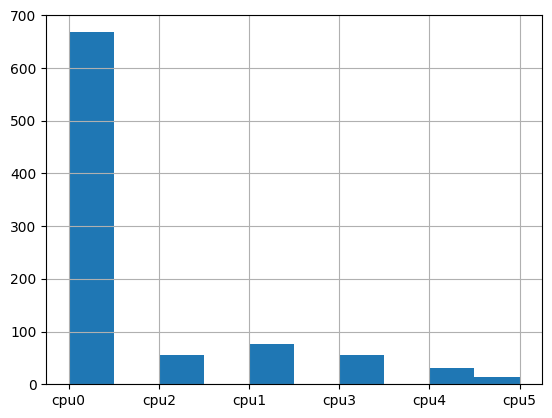

In [ ]:
hist = df['Processor'].hist()

# **Label Encoding - labels**

In [ ]:
label_encoder = LabelEncoder()
df['Processor'] = label_encoder.fit_transform(df['Processor'])
df['Type'] = label_encoder.fit_transform(df['Type'])

In [ ]:
df

,JOB ID,Type,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Processor,Priority,run_time,job_start_time
0,H30005,0,297.5,309.3,1525,41.7,235,0,5,16,0
1,M15387,2,297.6,309.6,1592,35.8,57,0,8,9,3
2,L48083,1,295.7,306.2,2270,14.6,149,2,8,17,15
3,M15252,2,297.6,308.5,1490,43.4,154,0,0,18,16
4,L47249,1,298.9,309.0,1410,65.7,191,2,2,6,28
...,...,...,...,...,...,...,...,...,...,...,...
895,H29466,0,298.8,309.0,1497,43.8,147,0,4,8,8641
896,H30276,0,296.1,306.8,1645,31.0,41,0,3,8,8645
897,M15312,2,297.4,308.6,1643,31.0,89,0,9,5,8655
898,H30368,0,295.6,306.2,1414,42.5,69,0,6,22,8666


# **Preprocessing**

In [ ]:
#Removing run_time column
df.drop('run_time', axis=1, inplace = True)

In [ ]:
data = df.copy()
df.drop('JOB ID',axis=1, inplace = True)

In [ ]:
data1 = data.describe()
data.describe()

,Type,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Processor,Priority,job_start_time
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,1.161111,298.377556,308.838222,1520.907778,42.402889,118.194444,0.606667,4.452222,4309.542222
std,0.594411,2.006748,1.389907,226.204769,12.095093,68.060457,1.203795,2.812048,2509.168372
min,0.000000,295.300000,305.700000,1181.000000,5.800000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,297.300000,308.200000,1379.000000,34.600000,59.000000,0.000000,2.000000,2134.500000
50%,1.000000,297.800000,308.600000,1470.000000,42.500000,119.000000,0.000000,4.000000,4280.500000
75%,2.000000,298.800000,309.500000,1589.000000,50.400000,180.250000,1.000000,7.000000,6488.250000
max,2.000000,304.400000,313.700000,2825.000000,75.400000,251.000000,5.000000,9.000000,8681.000000


In [ ]:
dict1 = {}
columns = ['Feature 1','Feature 2','Feature 3','Feature 4','Feature 5']
for column in columns:
  mini = data1[column]['min']
  maxi = data1[column]['max']
  dict1[column] = [mini,maxi]

In [ ]:
dict1

{'Feature 1': [295.3, 304.4],
 'Feature 2': [305.7, 313.7],
 'Feature 3': [1181.0, 2825.0],
 'Feature 4': [5.8, 75.4],
 'Feature 5': [0.0, 251.0]}

In [ ]:
X = df.drop(['Processor'], axis=1)
y = df['Processor']

In [ ]:
sm = SMOTE()
X_sm,y_sm=sm.fit_resample(X,y)
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_sm)))

Original dataset shape Counter({0: 668, 1: 76, 2: 56, 3: 56, 4: 30, 5: 14})
Resampled dataset shape Counter({0: 668, 2: 668, 1: 668, 3: 668, 4: 668, 5: 668})


In [ ]:
df1 = pd.DataFrame(X_sm, columns=X.columns)
df1['Processor'] = y_sm

In [ ]:
df1

,Type,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Priority,job_start_time,Processor
0,0,297.500000,309.300000,1525,41.700000,235,5,0,0
1,2,297.600000,309.600000,1592,35.800000,57,8,3,0
2,1,295.700000,306.200000,2270,14.600000,149,8,15,2
3,2,297.600000,308.500000,1490,43.400000,154,0,16,0
4,1,298.900000,309.000000,1410,65.700000,191,2,28,2
...,...,...,...,...,...,...,...,...,...
4003,0,299.143086,309.264392,1594,35.949616,163,3,2095,5
4004,2,298.678257,308.787236,1554,36.276322,111,3,4487,5
4005,0,300.658288,310.065825,1648,29.809550,173,1,3715,5
4006,0,298.805508,308.285733,1545,39.795888,154,2,3463,5


##**Outlier analysis**

<Axes: xlabel='Processor', ylabel='Feature 3'>

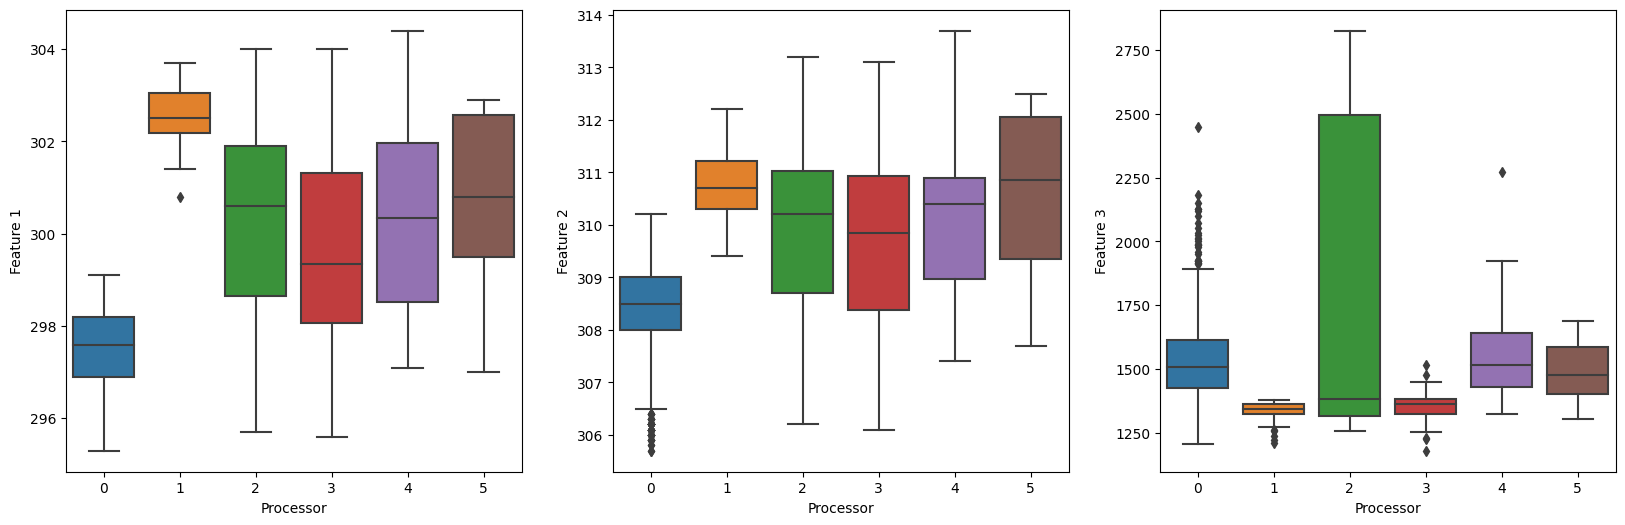

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(20,6))
sns.boxplot(x="Processor", y="Feature 1", data=df,ax=ax[0])
sns.boxplot(x="Processor", y="Feature 2", data=df,ax=ax[1])
sns.boxplot(x="Processor", y="Feature 3", data=df,ax=ax[2])

In [ ]:
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return z_scores > threshold

# Function to detect outliers using IQR
def detect_outliers_iqr(data, threshold=1.5):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - threshold * IQR
  upper_bound = Q3 + threshold * IQR
  return (data < lower_bound) | (data > upper_bound)

# Loop through each feature and detect outliers
outliers = {}
columns = ['Feature 1',	'Feature 2',	'Feature 3'	,'Feature 4','Feature 5']
for column in columns:
  outliers[column] = detect_outliers_iqr(df1[column])

# Display the outliers for each feature
for column, outlier_mask in outliers.items():
  print(f"Outliers in '{column}':")
  print(len(df1[column][outlier_mask]))

Outliers in 'Feature 1':
0
Outliers in 'Feature 2':
2
Outliers in 'Feature 3':
293
Outliers in 'Feature 4':
20
Outliers in 'Feature 5':
0


In [ ]:
df = df1.copy()

In [ ]:
def remove_outliers_iqr(df, threshold=1.5):
  df_no_outliers = df.copy()
  columns = ['Feature 1',	'Feature 2',	'Feature 3'	,'Feature 4','Feature 5']
  for column in df_no_outliers.columns:
    if column in columns:
      Q1 = df_no_outliers[column].quantile(0.25)
      Q3 = df_no_outliers[column].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - threshold * IQR
      upper_bound = Q3 + threshold * IQR
      df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]

  return df_no_outliers

In [ ]:
df_no_outliers = remove_outliers_iqr(df)
print(df_no_outliers)

      Type   Feature 1   Feature 2  Feature 3  Feature 4  Feature 5  Priority  \
0        0  297.500000  309.300000       1525  41.700000        235         5   
1        2  297.600000  309.600000       1592  35.800000         57         8   
3        2  297.600000  308.500000       1490  43.400000        154         0   
4        1  298.900000  309.000000       1410  65.700000        191         2   
5        1  302.600000  311.000000       1369  60.000000         93         5   
...    ...         ...         ...        ...        ...        ...       ...   
4003     0  299.143086  309.264392       1594  35.949616        163         3   
4004     2  298.678257  308.787236       1554  36.276322        111         3   
4005     0  300.658288  310.065825       1648  29.809550        173         1   
4006     0  298.805508  308.285733       1545  39.795888        154         2   
4007     1  302.260606  311.600674       1544  34.741976         60         3   

      job_start_time  Proce

In [ ]:
df = pd.DataFrame(df_no_outliers)

In [ ]:
len(df)

3713

In [ ]:
df.reset_index(inplace = True)

In [ ]:
df.drop('index',inplace = True,axis =1)

In [ ]:
df

,Type,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Priority,job_start_time,Processor
0,0,297.500000,309.300000,1525,41.700000,235,5,0,0
1,2,297.600000,309.600000,1592,35.800000,57,8,3,0
2,2,297.600000,308.500000,1490,43.400000,154,0,16,0
3,1,298.900000,309.000000,1410,65.700000,191,2,28,2
4,1,302.600000,311.000000,1369,60.000000,93,5,40,1
...,...,...,...,...,...,...,...,...,...
3708,0,299.143086,309.264392,1594,35.949616,163,3,2095,5
3709,2,298.678257,308.787236,1554,36.276322,111,3,4487,5
3710,0,300.658288,310.065825,1648,29.809550,173,1,3715,5
3711,0,298.805508,308.285733,1545,39.795888,154,2,3463,5


## **Normalising**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns you want to normalize
columns_to_normalize = ['Feature 1', 'Feature 2', 'Feature 3','Feature 4','Feature 5']

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [ ]:
df

,Type,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Priority,job_start_time,Processor
0,0,0.241758,0.443038,0.527607,0.361742,0.936255,5,0,0
1,2,0.252747,0.481013,0.630368,0.250000,0.227092,8,3,0
2,2,0.252747,0.341772,0.473926,0.393939,0.613546,0,16,0
3,1,0.395604,0.405063,0.351227,0.816288,0.760956,2,28,2
4,1,0.802198,0.658228,0.288344,0.708333,0.370518,5,40,1
...,...,...,...,...,...,...,...,...,...
3708,0,0.422317,0.438531,0.633436,0.252834,0.649402,3,2095,5
3709,2,0.371237,0.378131,0.572086,0.259021,0.442231,3,4487,5
3710,0,0.588823,0.539978,0.716258,0.136545,0.689243,1,3715,5
3711,0,0.385221,0.314650,0.558282,0.325680,0.613546,2,3463,5


## **Correlation**

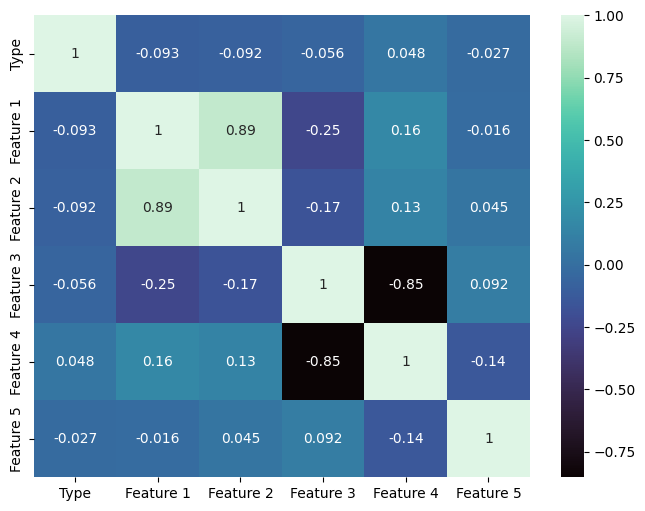

In [ ]:
columns1 = ['Type','Feature 1', 'Feature 2', 'Feature 3','Feature 4','Feature 5']
subset = df[columns1]
corrmat = subset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(8, 6))
g=sns.heatmap(subset.corr(),annot=True,cmap="mako")

In [ ]:
df1 = df.drop('Feature 3',axis = 1)

# **Model Building**

## **Train Test split**

In [ ]:
# Import necessary libraries

# Define your feature columns (X) and target column (y)
X = df[['Type','Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5']]
y = df['Processor']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train

,Type,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5
2894,1,0.562879,0.558016,0.750000,0.149227,0.932271
1966,1,0.794251,0.769708,0.138037,0.722870,0.784861
596,1,0.021978,0.037975,0.470859,0.342803,0.123506
1694,2,0.703092,0.645334,0.220859,0.828654,0.063745
2722,0,0.363294,0.302619,0.676380,0.225731,0.904382
...,...,...,...,...,...,...
1130,1,0.884555,0.740437,0.222393,0.416770,0.816733
1294,1,0.777727,0.554808,0.248466,0.748631,0.442231
860,1,0.763284,0.610499,0.260736,0.548362,0.474104
3507,0,0.342519,0.245016,0.680982,0.163076,0.657371


In [ ]:
y_train

2894    4
1966    3
596     0
1694    2
2722    4
       ..
1130    1
1294    1
860     1
3507    5
3174    5
Name: Processor, Length: 2970, dtype: int64

## **Logistic Regression**

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       143
           1       0.96      0.94      0.95       143
           2       0.98      0.94      0.96        88
           3       0.88      1.00      0.93       129
           4       0.89      0.97      0.93       119
           5       0.87      0.79      0.83       121

    accuracy                           0.90       743
   macro avg       0.90      0.90      0.90       743
weighted avg       0.90      0.90      0.90       743



## **MultiNomial Naive Bayes**

In [ ]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
training_score = cross_val_score(classifier, X_train, y_train, cv=5)
print("Training score: ", round(training_score.mean(), 2) * 100, "%")
pickle.dump(classifier, open('/content/drive/MyDrive/ASAPP/model.pkl','wb'))
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

Training score:  65.0 %
              precision    recall  f1-score   support

           0       0.88      0.52      0.66       143
           1       0.64      0.81      0.71       143
           2       0.00      0.00      0.00        88
           3       0.54      0.90      0.68       129
           4       0.75      0.64      0.69       119
           5       0.49      0.65      0.56       121

    accuracy                           0.62       743
   macro avg       0.55      0.59      0.55       743
weighted avg       0.59      0.62      0.58       743



In [ ]:
classifier = MultinomialNB()

# Define the hyperparameters and their possible values for tuning
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],  # Different values for smoothing parameter alpha
    'fit_prior': [True, False]  # Whether to learn class prior probabilities or not
}

grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)
best_classifier = grid_search.best_estimator_
y_pred = best_classifier.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

Best Hyperparameters:  {'alpha': 0.1, 'fit_prior': False}
Best Accuracy:  0.7592592592592593
              precision    recall  f1-score   support

           0       0.81      0.66      0.73       143
           1       0.78      0.84      0.81       143
           2       0.85      0.77      0.81        88
           3       0.69      0.90      0.78       129
           4       0.73      0.84      0.78       119
           5       0.67      0.49      0.56       121

    accuracy                           0.75       743
   macro avg       0.76      0.75      0.75       743
weighted avg       0.75      0.75      0.75       743



## **KNeighborsClassifier**

In [ ]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.81      0.89       143
           1       0.97      0.97      0.97       143
           2       0.98      0.99      0.98        88
           3       0.96      0.99      0.98       129
           4       0.91      0.97      0.94       119
           5       0.89      0.97      0.92       121

    accuracy                           0.95       743
   macro avg       0.95      0.95      0.95       743
weighted avg       0.95      0.95      0.95       743



## **RandomForestClassifier**

In [ ]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       143
           1       1.00      0.99      0.99       143
           2       0.98      0.99      0.98        88
           3       0.98      1.00      0.99       129
           4       0.99      0.99      0.99       119
           5       0.94      0.98      0.96       121

    accuracy                           0.98       743
   macro avg       0.98      0.98      0.98       743
weighted avg       0.98      0.98      0.98       743



##**Gradient Boosting**

In [ ]:
classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
report = classification_report(y_test, y_pred)
pickle.dump(classifier, open('/content/drive/MyDrive/ASAPP/gbmodel.pkl','wb'))
print(report)


              precision    recall  f1-score   support

           0       0.98      0.97      0.97       143
           1       1.00      0.99      0.99       143
           2       0.99      1.00      0.99        88
           3       0.99      1.00      1.00       129
           4       0.98      1.00      0.99       119
           5       0.98      0.98      0.98       121

    accuracy                           0.99       743
   macro avg       0.99      0.99      0.99       743
weighted avg       0.99      0.99      0.99       743



## **Hyperparameter tuning**

In [ ]:
# define hyperparameter grid for each classifier
classifiers = {
    'Logistic Regression': (LogisticRegression(), {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100]
    }),
    'K-Nearest Neighbors': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    }),
     'Multinomial Naive Bayes': (MultinomialNB(), {
        'alpha': [0.1, 0.5, 1.0, 2.0],
        'fit_prior': [True, False]
    }),
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    })
}

# Perform hyperparameter tuning for each classifier
for classifier_name, (classifier, param_grid) in classifiers.items():
    grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    print(f"Classifier: {classifier_name}")
    print("Best Hyperparameters: ", grid_search.best_params_)
    print("Best Accuracy: ", grid_search.best_score_)

    # Evaluate the best classifier on the test set
    best_classifier = grid_search.best_estimator_
    y_pred = best_classifier.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(report)
    print("***************************************************")

Classifier: Logistic Regression
Best Hyperparameters:  {'C': 100, 'penalty': 'l2'}
Best Accuracy:  0.9434343434343436
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       143
           1       0.97      0.98      0.97       143
           2       0.98      0.97      0.97        88
           3       0.95      0.99      0.97       129
           4       0.96      0.96      0.96       119
           5       0.87      0.85      0.86       121

    accuracy                           0.93       743
   macro avg       0.93      0.93      0.93       743
weighted avg       0.93      0.93      0.93       743

***************************************************
Classifier: K-Nearest Neighbors
Best Hyperparameters:  {'n_neighbors': 3, 'weights': 'distance'}
Best Accuracy:  0.9622895622895623
              precision    recall  f1-score   support

           0       0.98      0.87      0.93       143
           1       0.99      0.98      0.98   

In [ ]:
dict1

{'Feature 1': [295.3, 304.4],
 'Feature 2': [305.7, 313.7],
 'Feature 3': [1181.0, 2825.0],
 'Feature 4': [5.8, 75.4],
 'Feature 5': [0.0, 251.0]}

# Test data-1

In [ ]:
def transform_test_data(new_data):
  column_names = ['Type', 'Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5']
  if new_data[0] == 'H':
    new_data[0] = 0
  elif new_data[0] == 'M':
    new_data[0] = 2
  else:
    new_data[0] = 1
  for i in range(1,len(new_data)):
    new_data[i] = (new_data[i] - dict1[column_names[i]][0])/(dict1[column_names[i]][1] - dict1[column_names[i]][0])
  test_df = pd.DataFrame([new_data], columns=column_names)
  return test_df

input_string = input("")
converted_data = []
for item in input_string.split():
    if item.isdigit():
        converted_data.append(int(item))
    elif item.replace('.', '', 1).isdigit():
        converted_data.append(float(item))
    else:
        converted_data.append(item)
# print(converted_data)
new_data1 = converted_data[0:7]
# print(new_data1)
test_df = transform_test_data(new_data1)
print(test_df)

M 297.6 309.6 1592 35.8 57
   Type  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5
0     2   0.252747     0.4875       0.25   0.431034   0.227092


In [ ]:
pickled_model = pickle.load(open('gbmodel.pkl', 'rb'))
ypred1 = pickled_model.predict(test_df)
ypred1[0]

0

# Test data-2

In [ ]:
def transform_test_data(new_data):
  column_names = ['Type', 'Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5']
  if new_data[0] == 'H':
    new_data[0] = 0
  elif new_data[0] == 'M':
    new_data[0] = 2
  else:
    new_data[0] = 1
  for i in range(1,len(new_data)):
    new_data[i] = (new_data[i] - dict1[column_names[i]][0])/(dict1[column_names[i]][1] - dict1[column_names[i]][0])
  test_df = pd.DataFrame([new_data], columns=column_names)
  return test_df

input_string = input("")
converted_data = []
for item in input_string.split():
    if item.isdigit():
        converted_data.append(int(item))
    elif item.replace('.', '', 1).isdigit():
        converted_data.append(float(item))
    else:
        converted_data.append(item)
# print(converted_data)
new_data1 = converted_data[1:7]
# print(new_data1)
test_df = transform_test_data(new_data1)
print(test_df)

M 1 298.900000 309.000000 1410 65.700000 191 2 28
   Type  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5
0     1   0.395604     0.4125   0.139294   0.860632   0.760956


In [ ]:
pickled_model = pickle.load(open('gbmodel.pkl', 'rb'))
ypred1 = pickled_model.predict(test_df)
ypred1[0]

2

# Test data-3

In [ ]:
def transform_test_data(new_data):
  column_names = ['Type', 'Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5']
  if new_data[0] == 'H':
    new_data[0] = 0
  elif new_data[0] == 'M':
    new_data[0] = 2
  else:
    new_data[0] = 1
  for i in range(1,len(new_data)):
    new_data[i] = (new_data[i] - dict1[column_names[i]][0])/(dict1[column_names[i]][1] - dict1[column_names[i]][0])
  test_df = pd.DataFrame([new_data], columns=column_names)
  return test_df

input_string = input("")
converted_data = []
for item in input_string.split():
    if item.isdigit():
        converted_data.append(int(item))
    elif item.replace('.', '', 1).isdigit():
        converted_data.append(float(item))
    else:
        converted_data.append(item)
# print(converted_data)
new_data1 = converted_data[1:7]
# print(new_data1)
test_df = transform_test_data(new_data1)
print(test_df)

L48083 L 295.7 306.2 2270 14.6 149 8 17 15
   Type  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5
0     1   0.043956     0.0625   0.662409   0.126437   0.593625


In [ ]:
pickled_model = pickle.load(open('gbmodel.pkl', 'rb'))
ypred1 = pickled_model.predict(test_df)
ypred1[0]

0